In [1]:
from pysat.solvers import Glucose3
import random
import time

In [2]:
def random_ksat(N, M, k):
    g = Glucose3()
    variables = [-i for i in range(1, N+1)]
    variables += [i for i in range(1, N+1)]
    for _ in range(M):
        g.add_clause(random.sample(variables, k))
    
    return g

In [3]:
k = 3
N = 30
density = [0.1*i for i in range(1, 100)]
samples = 50
satisfied = {}
mean_time = {}

In [4]:
for d in density:
    mean_time[d] = 0.0
    satisfied[d] = 0.0
    
    for _ in range(samples):
        problem = random_ksat(N, int(N*d), k)
        start = time.time()
        satisfied[d] += int(problem.solve())
        end = time.time()
        mean_time[d] += end-start
        
    mean_time[d] /= samples
    satisfied[d] /= samples

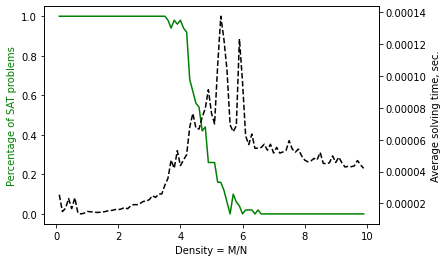

In [5]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(density, satisfied.values(), 'g')
ax2.plot(density, mean_time.values(), '--k')

ax1.set_xlabel('Density = M/N')
ax1.set_ylabel('Percentage of SAT problems', color='g')
ax2.set_ylabel('Average solving time, sec.', color='black')

#plt.show()
plt.savefig('ksat.png', dpi=300)